### Задание

Открыть файл `vgsales.csv`. Данный DataFrame содержит информацию о суммарных продажах видеоигр для игровых консолей. 
Описание признаков:
* `Rank` - порядковый номер записи в DataFrame
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

In [1]:
# 1 - Открываем файл

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df['Year'] = df['Year'].astype('Int64')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


([<matplotlib.axis.XTick at 0x1e498348400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

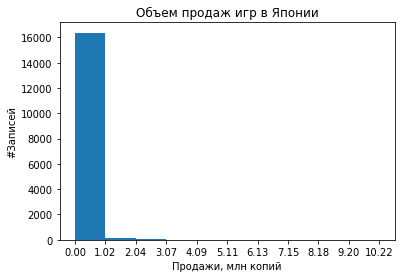

In [2]:
# 2 - Постройте гистограмму распределения объема продаж всех игр в Японии

his = df['JP_Sales']
plt.hist(his, bins=10)
plt.title('Объем продаж игр в Японии')
plt.xlabel('Продажи, млн копий')
plt.ylabel('#Записей')
bt = his.max() / 10
x_range = [i * bt for i in range(11)]
plt.xticks(x_range)

Text(0, 0.5, 'Продажи, млн копий')

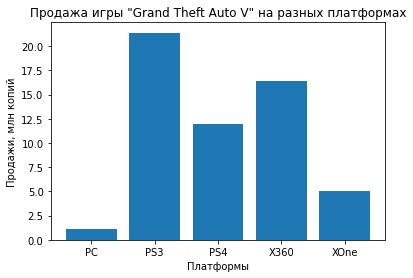

In [3]:
# 3 - Постройте столбчатую диаграмму, показывающую сравнение
# общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

barc = df[df['Name'] == 'Grand Theft Auto V'][['Platform', 'Global_Sales']].sort_values(['Platform'])
plt.bar(barc['Platform'], barc['Global_Sales'])
plt.title('Продажа игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')

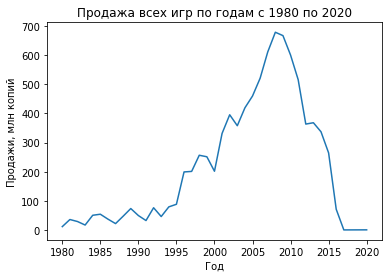

In [4]:
# 4 - Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

lin = df.groupby('Year')['Global_Sales'].sum()
plt.title('Продажа всех игр по годам с 1980 по 2020')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.plot(lin)

Text(0.5, 1.0, 'Соотношение продаж игры Super Mario Bros на разных платформах')

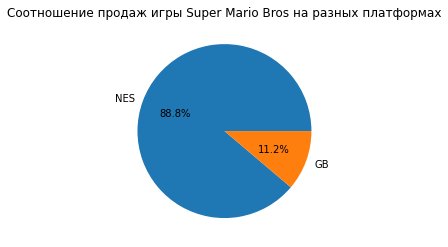

In [5]:
# 5 - Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros."
# на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой

pies = df[df['Name'] == 'Super Mario Bros.'][['Platform', 'Global_Sales']]
plt.pie(pies['Global_Sales'], labels=pies['Platform'], autopct='%1.1f%%')
plt.title("Соотношение продаж игры Super Mario Bros на разных платформах")

([<matplotlib.axis.XTick at 0x1e4985cc3a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

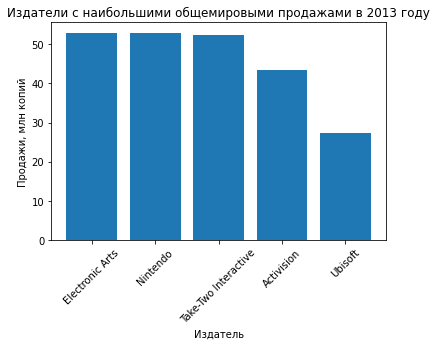

In [6]:
# 6 - Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году
# и проиллюстрируйте величину их продаж на столбчатой гистограмме

bars = df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum().nlargest(5)
plt.bar(bars.index, bars)
plt.title("Издатели с наибольшими общемировыми продажами в 2013 году")
plt.ylabel('Продажи, млн копий')
plt.xlabel('Издатель')
plt.xticks(bars.index, rotation=45)

([<matplotlib.axis.XTick at 0x1e4996022b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

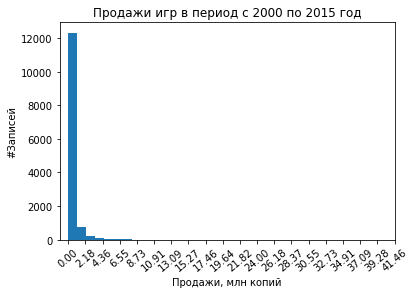

In [7]:
# 7 - Постройте гистограмму распределения величины общемировых продаж игр, 
# выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. 
# Гистограмма для большей точности должна содержать 20 столбцов, 
# отсечки на оси X должны соответствовать границам столбцов

df2 = df[(df['Publisher'] != 'Nintendo') & ((df['Year'] >= 2000) & (df['Year'] <= 2015))]['Global_Sales']
plt.hist(df2, bins=19)
bi = df2.max() / 10
x_range = [i * bi for i in range(20)]
plt.title('Продажи игр в период с 2000 по 2015 год')
plt.xlabel('Продажи, млн копий')
plt.ylabel('#Записей')
plt.xticks(x_range, rotation = 40)

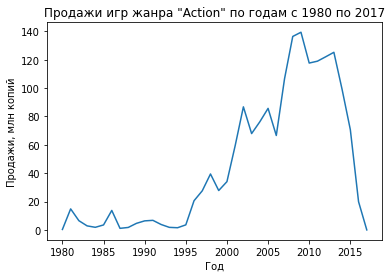

In [8]:
# 8 - Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

lin2 = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum()
plt.title('Продажи игр жанра "Action" по годам с 1980 по 2017')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.plot(lin2)

Text(0.5, 0, 'Жанр')

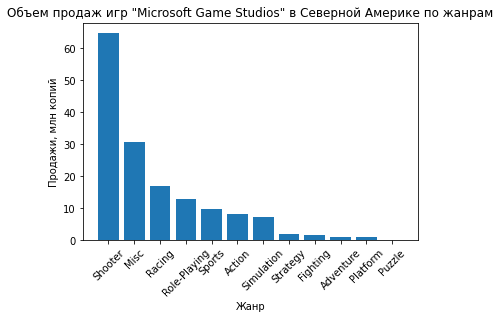

In [9]:
# 9 - С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр
# издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра.
# Столбцы расположите по убыванию

data = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
plt.bar(data.index, data)
plt.xticks(data.index, rotation=45)
plt.title('Объем продаж игр "Microsoft Game Studios" в Северной Америке по жанрам')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Жанр')

#### 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:

Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.
Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж

([<matplotlib.patches.Wedge at 0x1e4997cb8e0>,
 [Text(-0.966998388525614, 0.5243225310711582, 'False'),
  Text(0.9669984130709224, -0.5243224858026958, 'True')],
 [Text(-0.5274536664685167, 0.28599410785699536, '84.2%'),
  Text(0.5274536798568666, -0.28599408316510677, '15.8%')])

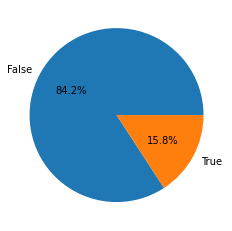

In [10]:
df['HasError'] = (df['Global_Sales'] - df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)).abs() > 0.01
data = df['HasError'].value_counts()
plt.pie(data, labels=data.index, autopct='%1.1f%%')